### Installing Required Libraries

In [1]:
import pandas as pd

In [2]:
from  sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder

### Loading the Dataset

In [3]:
dataset = pd.read_csv('/kaggle/input/social-media-users/SocialMediaUsersDataset.csv')

In [4]:
dataset.shape

(100000, 7)

In [5]:
dataset.isnull().sum()

UserID       0
Name         0
Gender       0
DOB          0
Interests    0
City         0
Country      0
dtype: int64

In [6]:
dataset = dataset.head(10000)

In [7]:
dataset.drop('DOB', axis = 1)

,UserID,Name,Gender,Interests,City,Country
0,1,Jesse Lawhorn,Female,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
1,2,Stacy Payne,Female,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
2,3,Katrina Nicewander,Female,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan
3,4,Eric Yarbrough,Male,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy
4,5,Daniel Adkins,Female,"'Politics', 'History'",Biruaca,Venezuela
...,...,...,...,...,...,...
9995,9996,Mary Waddell,Female,"'Pets', 'Music', 'Pets', 'Fitness'",Bālugaon,India
9996,9997,Philip Mcmanus,Female,"'Fitness', 'Sports', 'Finance and investments'...",Michelstadt,Germany
9997,9998,Christina Frandsen,Female,"'Travel', 'Outdoor activities', 'Gaming', 'Car...",Ropar,India
9998,9999,Carrie Weber,Male,"'Social causes and activism', 'Pets', 'Books',...",North Decatur,United States


# Feature Extraction

### Interests Feature Extraction

In [8]:
interests = dataset['Interests'].str.get_dummies(', ')  # One-hot encode interests
interests.fillna(0, inplace=True)  # Replace NaN values with 0
interests

,'Art','Beauty','Books','Business and entrepreneurship','Cars and automobiles','Cooking','DIY and crafts','Education and learning','Fashion','Finance and investments',...,'Outdoor activities','Parenting and family','Pets','Photography','Politics','Science','Social causes and activism','Sports','Technology','Travel'
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9996,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
9997,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9998,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


#### Calculating Age and adding it as a column

### Encoded Gender Feature Extraction

In [9]:
gender = dataset[['Gender']]
gender_encoded = pd.get_dummies(gender)
gender_encoded

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,0,1


### Encoded Location Feature Extraction

In [10]:
location = dataset[['City', 'Country']]
location_encoded = pd.get_dummies(location)
location_encoded

,City_Aalen,City_Aarschot,City_Abadan,City_Abancay,City_Abano Terme,City_Abasolo,City_Abay,City_Abaza,City_Abbiategrasso,City_Abeokuta,...,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vatican,Country_Venezuela,Country_Vietnam,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# User similarity calculation

In [11]:
features = pd.concat([interests, gender_encoded, location_encoded], axis=1)
features

,'Art','Beauty','Books','Business and entrepreneurship','Cars and automobiles','Cooking','DIY and crafts','Education and learning','Fashion','Finance and investments',...,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vatican,Country_Venezuela,Country_Vietnam,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Calculating cosine similarity between users based on their extracted features

In [12]:
similarity_matrix = cosine_similarity(features)

In [13]:
user_id = 5
similar_users_indices = similarity_matrix[user_id - 1].argsort()[::-1]  # Sort indices in descending order
similar_users = similar_users_indices[1:6]  # Get top 5 similar users (excluding the user itself)


In [14]:
# Print the similar users
for similar_user_index in similar_users:
    print(f"Similar User ID: {similar_user_index + 1}")

Similar User ID: 362
Similar User ID: 2465
Similar User ID: 2251
Similar User ID: 3672
Similar User ID: 8662


In [15]:
def give_similar(user):
    similar_users_indices = similarity_matrix[user_id - 1].argsort()[::-1]  # Sort indices in descending order
    similar_users = similar_users_indices[5:10]
    return similar_users

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a weighted bidirectional graph
G = nx.Graph()

user = 5
for i in give_similar(user):
    G.add_edge(user, i)
    for j in give_similar(i):
        G.add_edge(i,j)


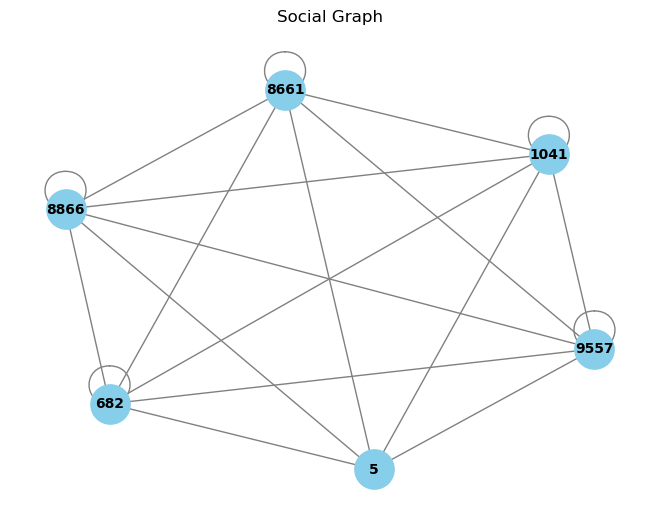

In [17]:
# Draw the graph
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=800, font_size=10, font_color="black", font_weight="bold", edge_color="gray")
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.title("Social Graph")

# Show the plot
plt.show()